In [37]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

In [38]:
data = pd.read_csv('2014-15 B1G Data(hailey).csv')
data_2014_15 = data[data['Year'] == '2014-2015'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2015_16 = data[data['Year'] == '2015-2016'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2016_17 = data[data['Year'] == '2016-2017'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2017_18 = data[data['Year'] == '2017-2018'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2018_19 = data[data['Year'] == '2018-2019'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
dataa = data.drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)

In [39]:
ind_variables_2014_15 = [i for i in data_2014_15.columns if i != 'W'] 
ind_variables_2015_16 = [i for i in data_2015_16.columns if i != 'W']
ind_variables_2016_17 = [i for i in data_2016_17.columns if i != 'W']
ind_variables_2017_18 = [i for i in data_2017_18.columns if i != 'W']
ind_variables_2018_19 = [i for i in data_2018_19.columns if i != 'W']
total_var = [i for i in dataa.columns if i != 'W']

In [40]:
y = 'W'
x = ind_variables_2014_15
model_simple = sm.OLS(data_2014_15['W'], data_2014_15[ind_variables_2014_15]).fit()

model = sm.OLS(data_2014_15[y], sm.add_constant(data_2014_15[ind_variables_2014_15])).fit()

In [41]:
y = 'W'
x = ['3P%-O', '3P%-T']
model_simple = sm.OLS(data_2014_15['W'], data_2014_15[x]).fit()

model = sm.OLS(data_2014_15[y], sm.add_constant(data_2014_15[x])).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     4.287
Date:                Sun, 01 Dec 2019   Prob (F-statistic):             0.0420
Time:                        12:45:53   Log-Likelihood:                 5.5458
No. Observations:                  14   AIC:                            -5.092
Df Residuals:                      11   BIC:                            -3.175
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1726      0.998      1.175      0.265      -1.024       3.369
3P%-O         -4.7920      2.397     -1.999      0.071     -10.068       0.484
3P%-T          2.8644      1.435      1.997      0.071      -0.293       6.022
==============================================================================
Omnibus:                        3.557   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.488
Skew:                           0.760   Prob(JB):                        0.475
Kurtosis:                       3.491   Cond. No.                         58.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
y = 'W'
x = ['FG%-T', 'FG%-O']
model_simple2 = sm.OLS(data['W'], data[total_var]).fit()

model2 = sm.OLS(data['W'], sm.add_constant(data[total_var])).fit()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [228]:
# g = sns.jointplot(x="FG%-O", y="W", data=data)

In [229]:
def find_coeff_ols(dataset, ind_var, dep_var='W'):
    '''
    function is designed to take in user chosen dependent, independent variables.
    returns model output using ordinary least squares from the statsmodels api.
    '''
    model_simple = sm.OLS(dataset[dep_var], dataset[ind_var]).fit()
    
    model = sm.OLS(dataset[dep_var], sm.add_constant(dataset[ind_var])).fit()  
    
    return model.summary()

find_coeff_ols(data, ['FG%-T', 'FG%-O'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     82.44
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.66e-19
Time:                        14:32:08   Log-Likelihood:                 52.957
No. Observations:                  70   AIC:                            -99.91
Df Residuals:                      67   BIC:                            -93.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3027      0.356      0.851      0.398      -0.408       1.013
FG%-T          4.4468      0.508      8.750      0.000       3.432       5.461
FG%-O         -3.9951      0.540     -7.392      0.000      -5.074      -2.916
==============================================================================
Omnibus:                        1.419   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.461
Skew:                           0.299   Prob(JB):                        0.482
Kurtosis:                       2.622   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
def visuals(dataset, desired_data1, desired_data2):
    '''
    Takes in two variables(generally the independent and dependent), and plots a joint plot.
    Kind is set to regression
    '''
    plot = sns.jointplot(x=str(desired_data1), y=str(desired_data2), data=dataset, kind='reg')
        

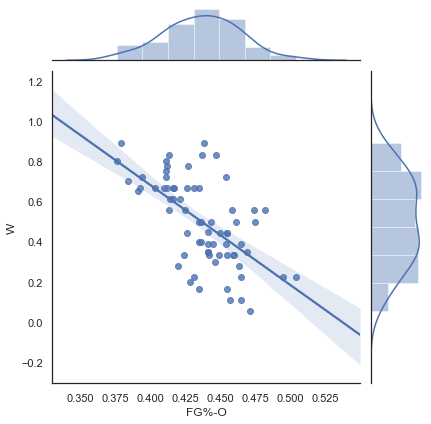

In [232]:
visuals(data, 'FG%-O', 'W')